# **Prepare**

In [ ]:
cd drive/MyDrive/DL/Project/

/content/drive/MyDrive/DL/Project


In [ ]:
! git clone https://github.com/Masao-Taketani/StarGAN-tf2

fatal: destination path 'StarGAN-tf2' already exists and is not an empty directory.


In [ ]:
cd StarGAN-tf2

/content/drive/My Drive/DL/Project/StarGAN-tf2


In [ ]:
!pip install tensorflow-addons

In [ ]:
!rm -rf "data/celeba"

# **Download dataset and create tfrecords**

In [ ]:
!bash download.sh celeba

Streaming output truncated to the last 5000 lines.
  inflating: ./data/celeba/images/195339.jpg  
  inflating: ./data/celeba/images/012465.jpg  
  inflating: ./data/celeba/images/089057.jpg  
  inflating: ./data/celeba/images/147796.jpg  
  inflating: ./data/celeba/images/192463.jpg  
  inflating: ./data/celeba/images/142818.jpg  
  inflating: ./data/celeba/images/148061.jpg  
  inflating: ./data/celeba/images/184432.jpg  
  inflating: ./data/celeba/images/201157.jpg  
  inflating: ./data/celeba/images/097288.jpg  
  inflating: ./data/celeba/images/130371.jpg  
  inflating: ./data/celeba/images/082864.jpg  
  inflating: ./data/celeba/images/017429.jpg  
  inflating: ./data/celeba/images/186077.jpg  
  inflating: ./data/celeba/images/126843.jpg  
  inflating: ./data/celeba/images/200381.jpg  
  inflating: ./data/celeba/images/012555.jpg  
  inflating: ./data/celeba/images/092238.jpg  
  inflating: ./data/celeba/images/008151.jpg  
  inflating: ./data/celeba/images/171418.jpg  
  inflati

In [ ]:
with open("data/celeba/list_attr_celeba.txt", "r") as f:
    lines = f.readlines()
    
n = 50002
i = 0
with open("data/celeba/list_attr_celeba.txt", "w") as f:
    for line in lines:
        f.write(line)
        i += 1
        if i == n:
            break

In [ ]:
!python data_loader.py

2021-07-17 14:22:32.369237: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
train len: 48001
test len: 1999
2021-07-17 14:22:34.839439: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-17 14:22:34.867198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-17 14:22:34.867814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-17 14:22:34.867858: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-17 14:22:34.869958: I tensorflow/

In [ ]:
ls data/celeba/images/006199.jpg

data/celeba/images/006199.jpg


In [ ]:
ls data/celeba/images/192753.jpg

data/celeba/images/192753.jpg


# **Train**

In [ ]:
!python train.py

2021-07-17 14:49:47.809072: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-17 14:49:49.620934: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-17 14:49:49.648873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-17 14:49:49.649491: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-17 14:49:49.649530: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-17 14:49:49.652222: I tensorflow/stream_executor/platform/default

# **Test**

In [ ]:
from utils import get_models_for_testing, test_image

In [ ]:
# Load trained models
gen, _ = get_models_for_testing()

Check Generator's model architecture
Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
tf.reshape (TFOpLambda)         (None, 1, 1, 5)      0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.cast (TFOpLambda)            (None, 1, 1, 5)      0           tf.reshape[0][0]                 
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
_____________________________________________________

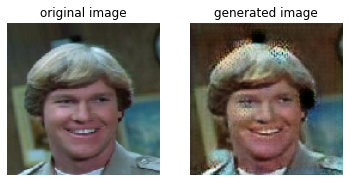

In [ ]:
img_path = "celeba/images/067479.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

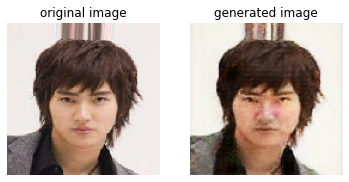

In [ ]:
img_path = "celeba/images/067532.jpg"

test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

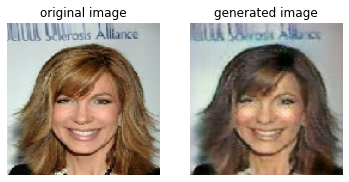

In [ ]:
img_path = "celeba/images/202559.jpg"

test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

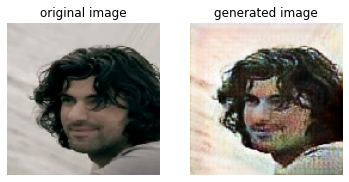

In [ ]:
img_path = "celeba/images/168835.jpg"

test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

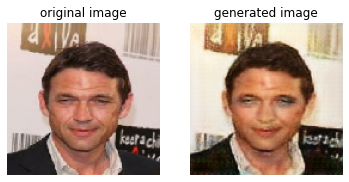

In [ ]:
img_path = "celeba/images/101273.jpg"

test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

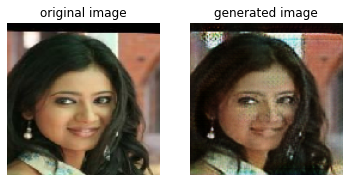

In [ ]:
img_path = "celeba/images/033717.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

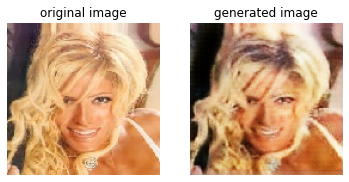

In [ ]:
img_path = "celeba/images/101283.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

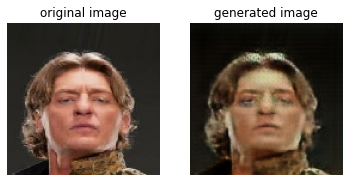

In [ ]:
img_path = "celeba/images/101278.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

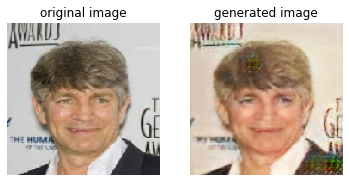

In [ ]:
img_path = "celeba/images/067518.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

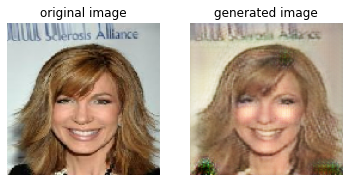

In [ ]:
img_path = "celeba/images/202559.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

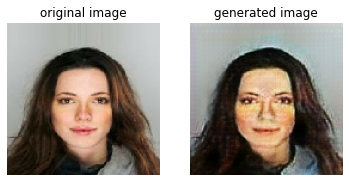

In [ ]:
img_path = "celeba/images/101167.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

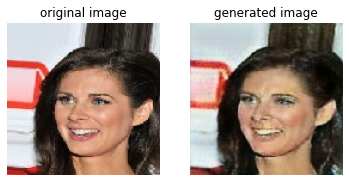

In [ ]:
img_path = "celeba/images/168642.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

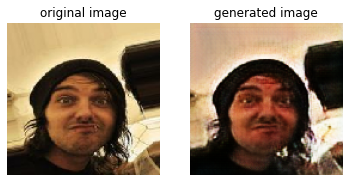

In [ ]:
img_path = "celeba/images/101065.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

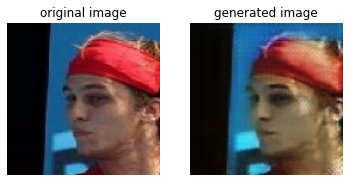

In [ ]:
img_path = "celeba/images/101090.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

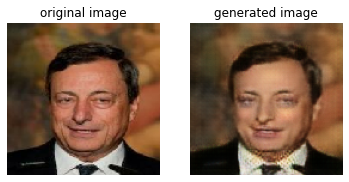

In [ ]:
img_path = "celeba/images/202371.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

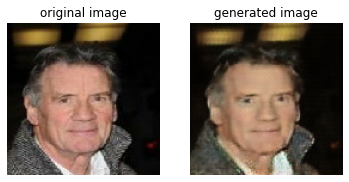

In [ ]:
img_path = "celeba/images/202352.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

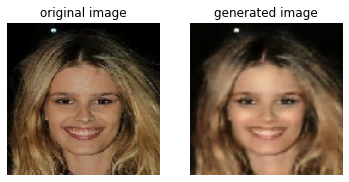

In [ ]:
img_path = "celeba/images/101035.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

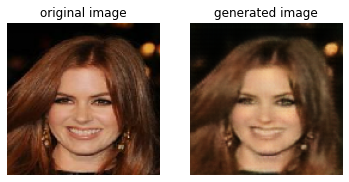

In [ ]:
img_path = "celeba/images/101145.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

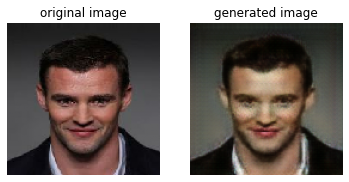

In [ ]:
img_path = "celeba/images/134861.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

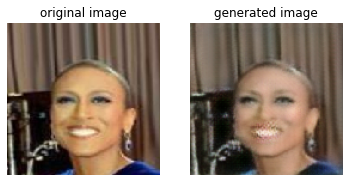

In [ ]:
img_path = "celeba/images/101114.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

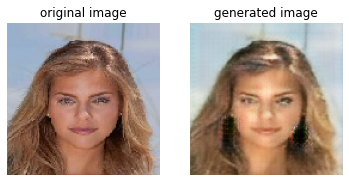

In [ ]:
img_path = "celeba/images/101115.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

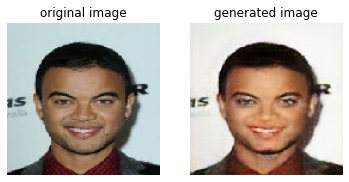

In [ ]:
img_path = "celeba/images/101116.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

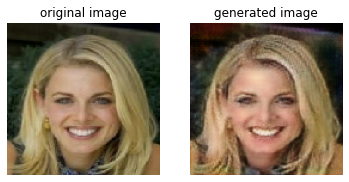

In [ ]:
img_path = "celeba/images/101117.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

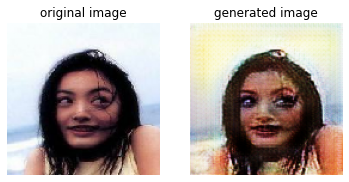

In [ ]:
img_path = "celeba/images/101118.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

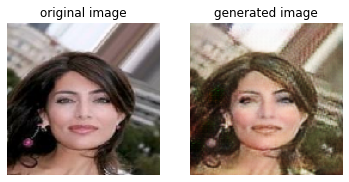

In [ ]:
img_path = "celeba/images/101119.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

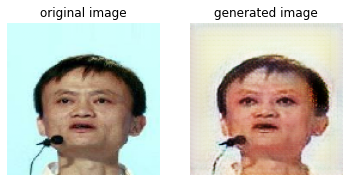

In [ ]:
img_path = "celeba/images/101120.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

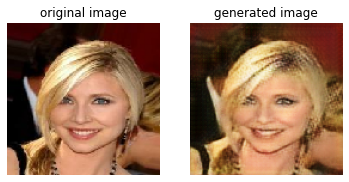

In [ ]:
img_path = "celeba/images/101121.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

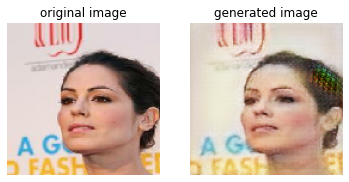

In [ ]:
img_path = "celeba/images/101122.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

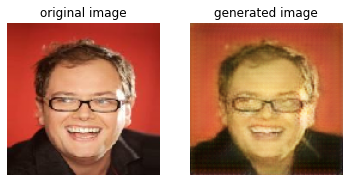

In [ ]:
img_path = "celeba/images/101125.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

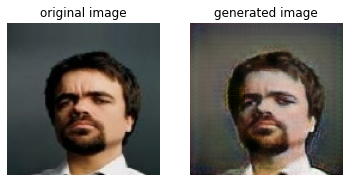

In [ ]:
img_path = "celeba/images/101130.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

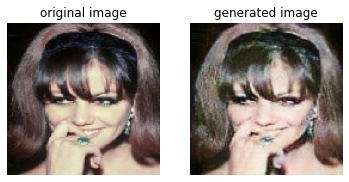

In [ ]:
img_path = "celeba/images/101155.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

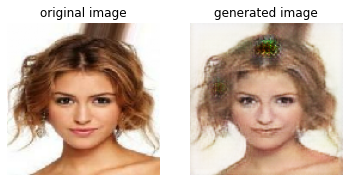

In [ ]:
img_path = "celeba/images/101139.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

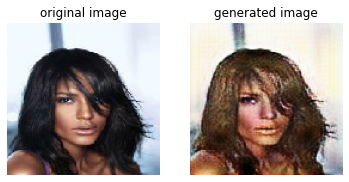

In [ ]:
img_path = "celeba/images/101164.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

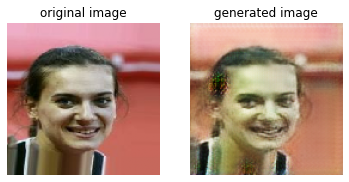

In [ ]:
img_path = "celeba/images/101143.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

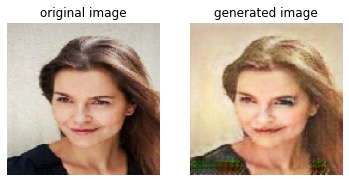

In [ ]:
img_path = "celeba/images/101177.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

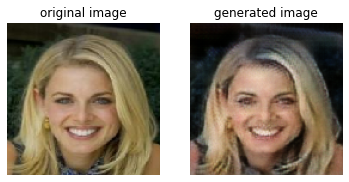

In [ ]:
img_path = "celeba/images/101117.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

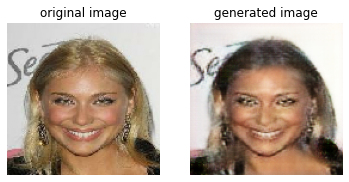

In [ ]:
img_path = "celeba/images/101147.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

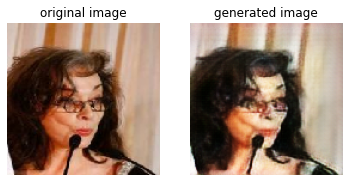

In [ ]:
img_path = "celeba/images/101197.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

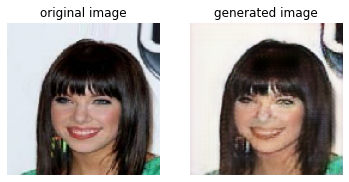

In [ ]:
img_path = "celeba/images/101159.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

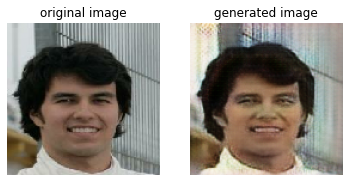

In [ ]:
img_path = "celeba/images/101188.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

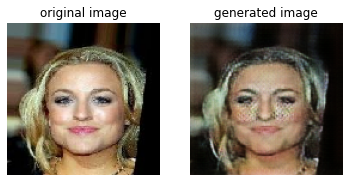

In [ ]:
img_path = "celeba/images/101192.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

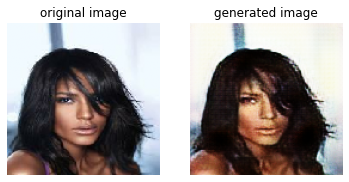

In [ ]:
img_path = "celeba/images/101164.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

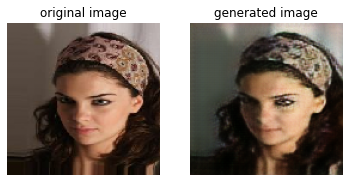

In [ ]:
img_path = "celeba/images/101292.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

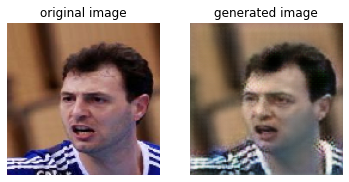

In [ ]:
img_path = "celeba/images/101196.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

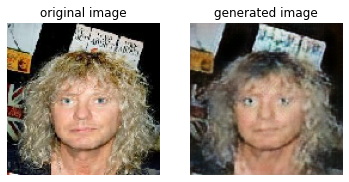

In [ ]:
img_path = "celeba/images/101236.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

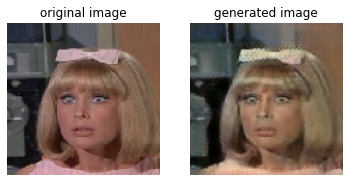

In [ ]:
img_path = "celeba/images/101254.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

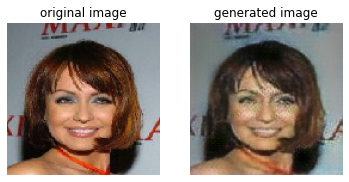

In [ ]:
img_path = "celeba/images/101345.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

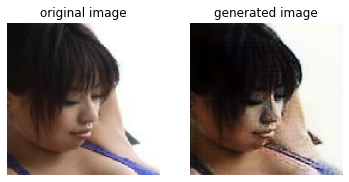

In [ ]:
img_path = "celeba/images/101348.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

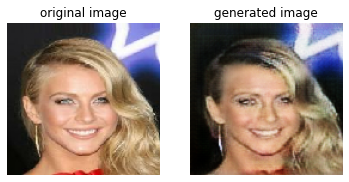

In [ ]:
img_path = "celeba/images/101432.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

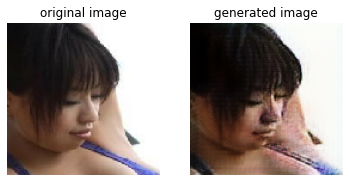

In [ ]:
img_path = "celeba/images/101348.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

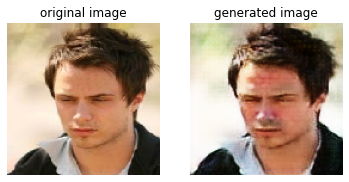

In [ ]:
img_path = "celeba/images/101592.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

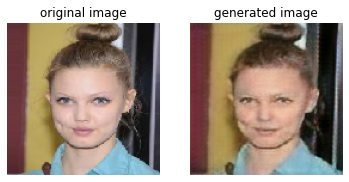

In [ ]:
img_path = "celeba/images/101542.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

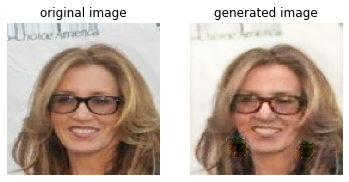

In [ ]:
img_path = "celeba/images/101654.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

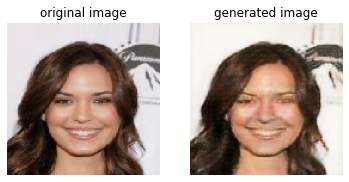

In [ ]:
img_path = "celeba/images/101621.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

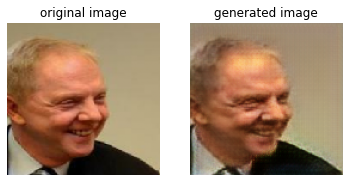

In [ ]:
img_path = "celeba/images/101741.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

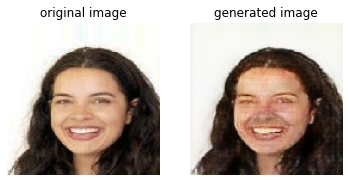

In [ ]:
img_path = "celeba/images/101731.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

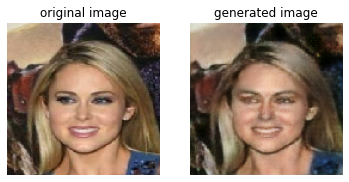

In [ ]:
img_path = "celeba/images/101981.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

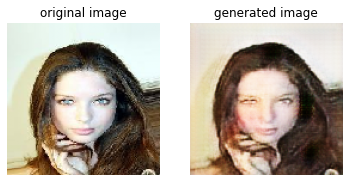

In [ ]:
img_path = "celeba/images/101321.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

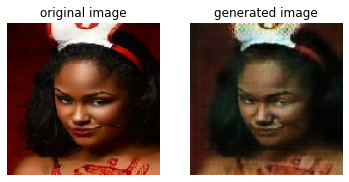

In [ ]:
img_path = "celeba/images/101123.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

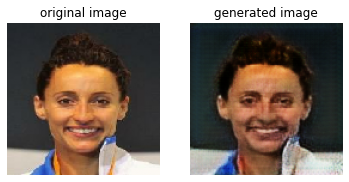

In [ ]:
img_path = "celeba/images/101543.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

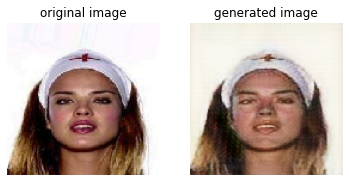

In [ ]:
img_path = "celeba/images/101478.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

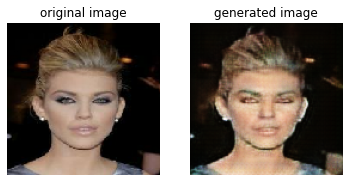

In [ ]:
img_path = "celeba/images/101412.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)